<a href="https://colab.research.google.com/github/an-pk-chu/Customer-Segmentation-Revenue-Prediction-for-Online-Retail/blob/main/Customer_Segmentation_%26_Revenue_Prediction_for_Online_Retail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Customer Segmentation with Cluster Analysis

#1. Data Preparation & Exploration

In [ ]:
import pandas as pd

#Load the original dataset
df = pd.read_excel('Online Retail.xlsx')


In [ ]:
#Apply filtering for Country Column - Only United kingdom
df['Country'] = df['Country'].str.strip()
df_filtered = df[df['Country'] == 'United Kingdom']


In [ ]:
#Double check filtering
print(df_filtered['Country'].unique())
df_filtered.head(40)

['United Kingdom']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [ ]:
#write the filterred df as CSV
df_filtered.to_csv('Online Retail Filtered.csv', index=False)


In [ ]:
#make new CSV main DF
df = pd.read_csv('Online Retail Filtered.csv')


In [ ]:
#Check for missing values
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,133600
Country,0


In [ ]:
#Count for Duplicates
df.duplicated().sum()

5178

In [ ]:
#Drop or replace missing values and duplicates
df = df.dropna(subset=['CustomerID'])
df = df.dropna(subset=['Description'])
df.drop_duplicates(inplace=True)
df.isnull().sum()
df.duplicated().sum()

0

When handling missing values for Description and CustomerID, I dropped or replaced them due to their significant proportion of missing data. Since these variables aren't crucial for the main business questions, I considered creating two datasets—one including these variables and another excluding them. This allows flexibility to refer back to them if needed, while maintaining a cleaner dataset for analysis.

In [ ]:
#View data types
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 356728 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    356728 non-null  object 
 1   StockCode    356728 non-null  object 
 2   Description  356728 non-null  object 
 3   Quantity     356728 non-null  int64  
 4   InvoiceDate  356728 non-null  object 
 5   UnitPrice    356728 non-null  float64
 6   CustomerID   356728 non-null  float64
 7   Country      356728 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 24.5+ MB


In [ ]:
#Change data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 356728 entries, 0 to 495477
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    356728 non-null  object        
 1   StockCode    356728 non-null  object        
 2   Description  356728 non-null  object        
 3   Quantity     356728 non-null  int64         
 4   InvoiceDate  356728 non-null  datetime64[ns]
 5   UnitPrice    356728 non-null  float64       
 6   CustomerID   356728 non-null  object        
 7   Country      356728 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 24.5+ MB


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Create two new columns - Revenue and OrderSize (i.e., Revenue / Quantity).

In [ ]:
# Create the Revenue column: Quantity * UnitPrice
df['Revenue'] = df['Quantity'] * df['UnitPrice']

# Create the OrderSize column: Revenue / Quantity

df['OrderSize'] = df['Revenue'] / df['Quantity']

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,OrderSize
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2.55
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,3.39
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2.75
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,3.39
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,3.39


Create the cluster data by identifying relevant features/variables for clustering.

In [ ]:
# Calculate the number of unique orders for each customer
customer_df = df.groupby('CustomerID').agg({
    'Revenue': 'sum',              # Total Revenue per customer
    'Quantity': 'sum',             # Total Quantity purchased by customer
    'InvoiceNo': 'nunique'         # Number of unique orders per customer
}).reset_index()

# Rename the column
customer_df.rename(columns={'InvoiceNo': 'NumberOfOrders'}, inplace=True)


# Calculate Recency for each customer (days since last purchase)
max_date = df['InvoiceDate'].max()  # Most recent date in the dataset
recency = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (max_date - x.max()).days  # Difference between max date and last purchase
}).reset_index()

# Rename the column
recency.rename(columns={'InvoiceDate': 'Recency'}, inplace=True)

# Merge Recency back into customer_df
customer_df = customer_df.merge(recency, on='CustomerID', how='left')

customer_df.head()

,CustomerID,Revenue,Quantity,NumberOfOrders,Recency
0,12346.0,0.00,0,2,325
1,12747.0,4196.01,1275,11,1
2,12748.0,28405.56,23750,224,0
3,12749.0,3868.20,1422,8,3
4,12820.0,942.34,722,4,2


### Feature Selection and Rationale for Clustering

#### **1. Revenue**
- **Description**: The total amount a customer has spent.
- **Rationale**: Helps identify high-value vs. low-value customers. By understanding how much each customer has spent, we can differentiate between high spenders and low spenders. This allows us to prioritize high-revenue customers for special campaigns or loyalty programs.

#### **2. Quantity**
- **Description**: The total number of items purchased by each customer.
- **Rationale**: Shows whether a customer frequently purchases in large quantities or smaller quantities. Understanding purchasing volume helps identify bulk buyers, who may be targeted with volume discounts or special offers.

#### **3. Number of Orders (NumberOfOrders)**
- **Description**: The number of unique orders placed by a customer.
- **Rationale**: An indicator of customer engagement and frequency of purchase. Customers with a high number of orders are typically more engaged and may be more loyal to the brand. Segmenting customers based on their order frequency helps identify regular shoppers who could benefit from loyalty rewards.

#### **4. Recency**
- **Description**: The number of days since the customer's most recent purchase.
- **Rationale**: Helps understand customer activity. Customers who made recent purchases are more likely to be engaged compared to those who haven’t purchased in a while. By segmenting customers based on recency, we can create strategies to re-engage inactive customers or nurture relationships with active customers.

### **Overall Rationale**

These four features—**Revenue**, **Quantity**, **Number of Orders**, and **Recency**—provide a comprehensive view of customer behavior:
- **Spending habits** (‘Revenue’)
- **Buying volume** (‘Quantity’)
- **Customer engagement** (‘Number of Orders’)
- **Customer activity** (‘Recency’)

By combining these features, we can create customer segments that represent different purchasing behaviors, such as **high-value loyal customers**, **new customers**, **inactive customers**, and **bulk buyers**. This enables the business to tailor marketing strategies and improve customer satisfaction and revenue growth.



#2. Perform Clustering and Add Cluster Labels (16):

In [ ]:
from sklearn.preprocessing import StandardScaler

# Features to standardize
features = ['Revenue', 'Quantity', 'NumberOfOrders', 'Recency']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(customer_df[features])

# Convert back to DataFrame for convenience
X_scaled_df = pd.DataFrame(X_scaled, columns=features)


In [ ]:
from sklearn.cluster import KMeans

# Initialize the K-Means model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=42)

# Fit the model to the standardized features
customer_df['Cluster'] = kmeans.fit_predict(X_scaled_df)

# Check the updated dataframe with cluster labels
print(customer_df.head())


  CustomerID   Revenue  Quantity  NumberOfOrders  Recency  Cluster
0    12346.0      0.00         0               2      325        0
1    12747.0   4196.01      1275              11        1        1
2    12748.0  28405.56     23750             224        0        2
3    12749.0   3868.20      1422               8        3        1
4    12820.0    942.34       722               4        2        1


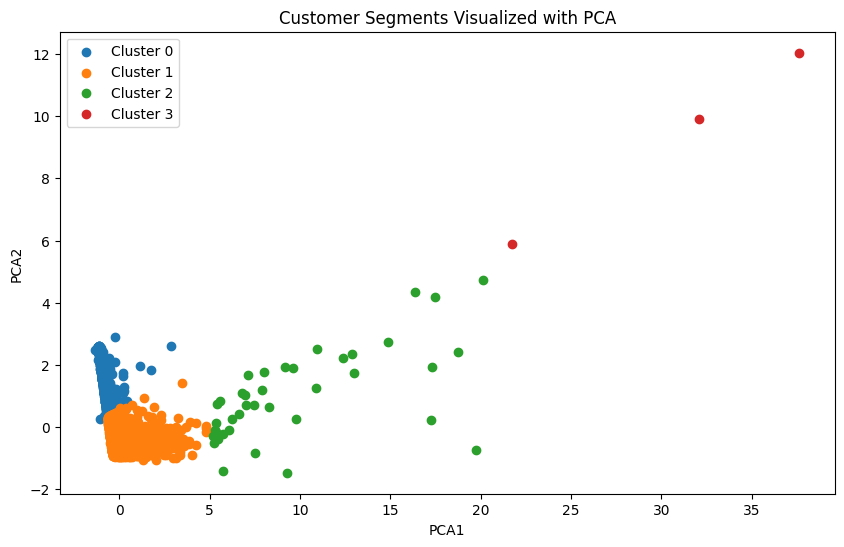

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2D for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a new DataFrame to plot the clusters
pca_df = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = customer_df['Cluster']

# Plot the clusters
plt.figure(figsize=(10, 6))
for cluster in pca_df['Cluster'].unique():
    cluster_data = pca_df[pca_df['Cluster'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')

plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Customer Segments Visualized with PCA')
plt.legend()
plt.show()


#3. Business Interpretation:

In [ ]:
# Group the DataFrame by 'Cluster' and calculate summary statistics
cluster_summary = customer_df.groupby('Cluster').agg({
    'Revenue': ['mean', 'median'],
    'Quantity': ['mean', 'median'],
    'NumberOfOrders': ['mean', 'median'],
    'Recency': ['mean', 'median']
}).reset_index()

# Print the summary to understand the characteristics of each cluster
print(cluster_summary)


  Cluster        Revenue                 Quantity          NumberOfOrders  \
                    mean     median          mean   median           mean   
0       0     420.506312     285.33    238.006924    140.0       1.854599   
1       1    1556.675862     852.39    951.504315    500.0       5.358647   
2       2   32832.006667   28405.56  20553.692308  16335.0      58.846154   
3       3  177295.346667  187322.17  65381.000000  64122.0      54.333333   

             Recency         
  median        mean median  
0    1.0  242.870425  238.0  
1    3.0   38.947532   29.0  
2   46.0    4.948718    2.0  
3   55.0    3.000000    2.0  


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for seaborn
sns.set(style="whitegrid")

# Plot the average Revenue for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y=('Revenue', 'mean'), data=cluster_summary)
plt.title('Average Revenue by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Revenue')
plt.show()

# Plot the average Quantity for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y=('Quantity', 'mean'), data=cluster_summary)
plt.title('Average Quantity by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Quantity')
plt.show()

# Plot the average Number of Orders for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y=('NumberOfOrders', 'mean'), data=cluster_summary)
plt.title('Average Number of Orders by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Number of Orders')
plt.show()

# Plot the average Recency for each cluster
plt.figure(figsize=(10, 6))
sns.barplot(x='Cluster', y=('Recency', 'mean'), data=cluster_summary)
plt.title('Average Recency by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Average Recency (days)')
plt.show()


NameError: name 'cluster_summary' is not defined

<Figure size 1000x600 with 0 Axes>

### Cluster Analysis Summary

#### **Cluster 0: Low-Value, Infrequent Customers**
- **Revenue**: Low (average ~420)
- **Quantity**: Low (average ~238)
- **Number of Orders**: Very low (average ~1.85)
- **Recency**: Very high (average ~242 days)

**Description**:
- These customers have low total spending, only made 1-2 purchases, and haven’t been active recently. They are low-value, infrequent customers who may have purchased only once a long time ago.

**Possible Action**:
- Consider re-engagement strategies like **email campaigns** offering discounts to bring them back.

#### **Cluster 1: Medium Engagement, Moderate Spending**
- **Revenue**: Moderate (average ~1,557)
- **Quantity**: Moderate (average ~952)
- **Number of Orders**: Low to moderate (average ~5.36)
- **Recency**: High (average ~39 days)

**Description**:
- These customers spend moderately and have made multiple purchases but are not recent or frequent buyers. They tend to be medium-value customers who need encouragement to stay engaged.

**Possible Action**:
- Consider offering **loyalty incentives** or personalized discounts to encourage more frequent purchases.

#### **Cluster 2: High-Value, High Engagement Customers**
- **Revenue**: High (average ~32,832)
- **Quantity**: Very high (average ~20,554)
- **Number of Orders**: Very high (average ~58.8)
- **Recency**: Low (average ~5 days)

**Description**:
- These customers are highly engaged, make frequent purchases, and contribute a high amount of revenue. They are the **high-value loyal customers** and are active in purchasing recently.

**Possible Action**:
- Retain this segment with **exclusive loyalty programs**, VIP rewards, and early access to new products or promotions.

#### **Cluster 3: Ultra High-Value Bulk Buyers**
- **Revenue**: Very High (average ~177,295)
- **Quantity**: Extremely high (average ~65,381)
- **Number of Orders**: Very high (average ~54.3)
- **Recency**: Low (average ~3 days)

**Description**:
- These are the **highest-value customers**, who purchase in bulk and do so frequently. They contribute the most revenue by far.

**Possible Action**:
- Offer **dedicated account managers**, and **personalized exclusive promotions** such as discounts for large orders, and free shipping to maintain their loyalty and increase order sizes.

### **2. Which Customer Segment Is the Most Valuable?**

#### **Cluster 3: Ultra High-Value Bulk Buyers**
- **Most Valuable Segment**: Cluster 3 stands out as the most valuable segment due to its extremely high **average revenue**, **high quantity purchased**, and **low recency**. These customers are the ones driving a significant portion of the business's revenue, and their frequent engagement makes them highly valuable.

**Suggestion for Targeting This Segment**:
- **Exclusive Promotions and Personalized Attention**:
  - Consider offering **special volume-based discounts** and dedicated support for these customers.
  - Personalized communications, such as **exclusive offers** or **early access** to new products, can further incentivize these ultra-high-value customers to maintain and even increase their spending.

### **Summary**
- **Cluster 0**: Low-value, infrequent customers. Focus on re-engagement strategies.
- **Cluster 1**: Moderate-value, medium-engagement customers. Incentivize with loyalty rewards.
- **Cluster 2**: High-value loyal customers. Maintain loyalty with VIP programs.
- **Cluster 3**: Ultra high-value, high-frequency bulk buyers. Provide personalized attention and exclusive benefits.



# Part 2: Revenue Prediction with Regression Analysis

# 1. Define the Target (i.e., Dependent Variable) and Features (i.e., Independent Variables)

In [ ]:
# Define the target variable (Revenue)
y = df['Revenue']

# Define the features that might predict revenue
X = df[['Quantity', 'UnitPrice', 'OrderSize']]

# Display the target and features
print("Target (Revenue):")
print(y.head())
print("\nFeatures (Quantity, UnitPrice, OrderSize):")
print(X.head())


Target (Revenue):
0    15.30
1    20.34
2    22.00
3    20.34
4    20.34
Name: Revenue, dtype: float64

Features (Quantity, UnitPrice, OrderSize):
   Quantity  UnitPrice  OrderSize
0         6       2.55       2.55
1         6       3.39       3.39
2         8       2.75       2.75
3         6       3.39       3.39
4         6       3.39       3.39


# 2. Build the Regression Model (20)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Get the coefficients and intercept
coefficients = model.coef_
intercept = model.intercept_

# Display the coefficients and intercept
print("Coefficients:", coefficients)
print("Intercept:", intercept)

Coefficients: [ 1.02035272 -0.05153108 -0.05153108]
Intercept: 7.874468616679849


### **Feature with the Strongest Impact on Revenue**

Based on the **coefficients** of the regression model:

- **Coefficients**: `[1.02035272, -0.05153108, -0.05153108]`
  - The coefficient with the largest absolute value is **`1.02035272`**, which corresponds to **`Quantity`**.

### **Explanation**:

- **`Quantity`** has the strongest impact on `Revenue`, with a positive coefficient of approximately **1.02**.
- **Interpretation**:
  - For every unit increase in **`Quantity`**, **`Revenue`** is expected to increase by approximately **1.02** units, assuming all other factors remain constant.
  - This means that **`Quantity`** is the primary driver of revenue in this model.

### **Business Perspective**:

- Since **`Quantity`** has the greatest impact on revenue, the company should focus on strategies to **increase the number of items purchased** by customers.
- **Actions** might include:
  - **Volume discounts** to encourage larger purchases.
  - **Bundle offers** to incentivize buying more items in one transaction.
  - **Upselling or cross-selling** strategies to increase the quantity per order.

# 3. Evaluate Model Performance:

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate R-squared, MAE, and RMSE
r_squared = model.score(X_test, y_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Display the evaluation metrics
print("R-squared:", r_squared)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)


R-squared: 0.7237400169849354
Mean Absolute Error (MAE): 16.486041643544016
Root Mean Squared Error (RMSE): 477.24010491722083


##**Model Performance Evaluation**

#### **1. How Well Does the Model Predict Revenue?**

- **R-squared (`R²`): 0.72**
  - The **R-squared value** of **0.72** indicates that approximately **72% of the variance** in the `Revenue` can be explained by the selected features (`Quantity`, `UnitPrice`, `OrderSize`). This suggests that the model has a **good fit**, but there is still **28% of the variance** that is not explained by the current features.

- **Mean Absolute Error (`MAE`): 16.49**
  - The **MAE** is **16.49**, which indicates that, on average, the model’s predictions are off by **16.49 units** of revenue. Lower values are better, and while this is reasonable, it suggests room for improvement.

- **Root Mean Squared Error (`RMSE`): 477.24**
  - The **RMSE** is quite high, indicating that there are some large errors in predictions. The **RMSE** is sensitive to outliers, which implies that the model might be struggling with some extreme values in the dataset.

#### **2. Limitations of the Model**

- **Linear Relationship Assumption**:
  - The model assumes a **linear relationship** between features (`Quantity`, `UnitPrice`, `OrderSize`) and the target (`Revenue`). However, the true relationship could be more complex and potentially non-linear, making the linear model inadequate for capturing all interactions.

- **Presence of Outliers**:
  - The high **RMSE** indicates potential **outliers** in the dataset that could be affecting the model's performance. Large transactions or special cases may not be well represented by the features used.

- **Limited Features**:
  - The current set of features might not capture all the relevant aspects that influence revenue. Factors like **customer loyalty**, **seasonality**, or **promotional campaigns** are not considered.

#### **3. Proposed Improvement**

- **Add Interaction Terms**:
  - **Interaction terms** between features like `Quantity * UnitPrice` could provide more insight into how different factors combine to influence `Revenue`. This can help the model capture **non-linear relationships** and interactions that have a significant impact on revenue.

- **Non-Linear Model**:
  - Consider using a **non-linear model** like **Decision Trees** or **Random Forests**, which can better capture complex relationships between features and the target variable.

- **Remove Outliers**:
  - Identify and **remove or treat outliers** that may be skewing the predictions and leading to high RMSE values.

#4. Visualize Predicted vs. Actual Revenue:

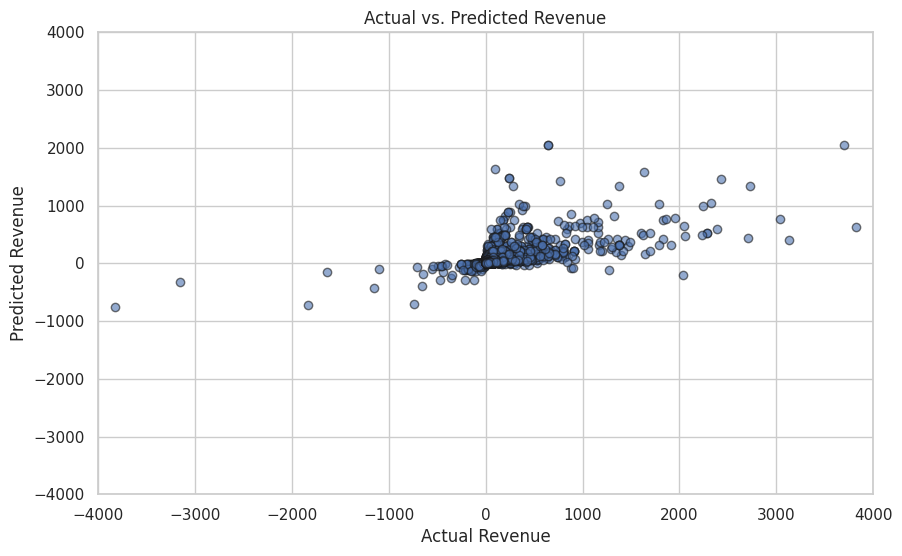

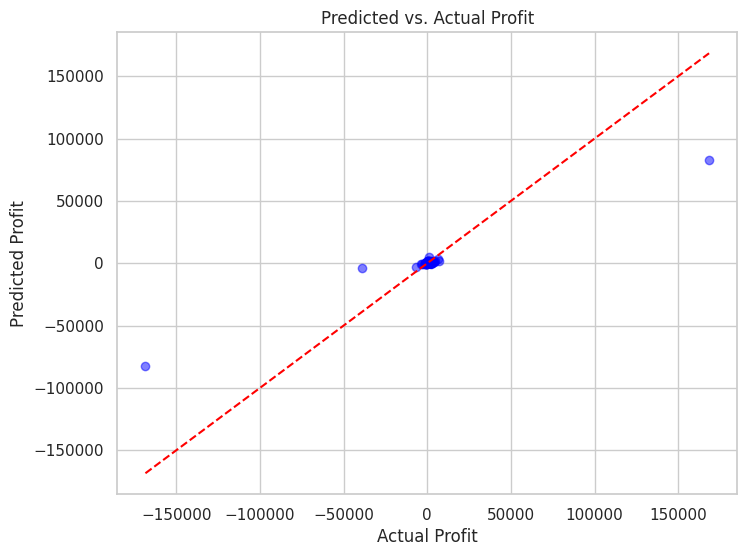

In [ ]:
# Create a scatter plot of Actual vs. Predicted Revenue
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='k')
plt.xlim(-4000, 4000)
plt.ylim(-4000, 4000)
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs. Predicted Revenue')
plt.grid(True)
plt.show()


import matplotlib.pyplot as plt

# Plot predicted vs actual profit
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle="--") # Line for perfect prediction
plt.xlabel("Actual Profit")
plt.ylabel("Predicted Profit")
plt.title("Predicted vs. Actual Profit")
plt.show()

### **Trends and Outliers in the Plot**

#### **1. Observations of Trends and Outliers**
- **Concentration at the Origin**:
  - There is a **dense cluster of points** around the origin (0, 0), which indicates that for many transactions, both **actual revenue** and **predicted revenue** are quite low or close to zero.
  - This suggests that the model is reasonably capturing **low-revenue transactions** but struggles to differentiate among small values effectively.

- **Scattered Outliers**:
  - There are **points spread far from the main cluster**, both in negative and positive directions, indicating **high prediction errors** for those transactions.
  - These outliers show where the model predicted either much higher or much lower revenue compared to the actual values.

#### **Interpretation from a Business Perspective**

- **Prediction Errors for Unique Purchasing Behaviors**:
  - The scattered outliers may represent **unique purchasing behaviors**, such as:
    - **Large one-time purchases**: Transactions involving unusually high quantities or costly items that are not frequent. The model struggles to generalize well for these cases, potentially because they are underrepresented in the training data.
    - **Returns or Cancellations**: The negative values may indicate situations where products were returned, or cancellations took place, which the model might not be handling well.

- **Potential Risks**:
  - Customers or transactions with **high errors** (especially negative values) might represent **high-risk customers**—those who are more likely to return products or make irregular purchases.
  - Understanding the characteristics of these outliers can help identify customers who may require **different handling**, such as better communication or targeted offers to reduce return rates.

#### **Next Steps for Improvement**:
- **Examine Outliers**: Investigate the specific transactions associated with outliers to understand if they have distinct characteristics (e.g., very high quantities, special discounts, or return behaviors).
- **Feature Engineering**: Add features that could better capture these unique behaviors, such as **customer return rates**, **transaction type** (e.g., regular vs. promotional), or **time of year** to account for seasonality.
- **Use a More Robust Model**: Consider using a non-linear model, such as **Random Forest** or **Gradient Boosting**, which can better handle non-linear relationships and provide more nuanced predictions for high-revenue transactions.


# Part 3: Summary and Business Recommendations

### **1. Customer Segment Recommendations**

Based on the cluster analysis, here are strategies to engage each customer segment:

- **Cluster 0: Low-Value, Infrequent Customers**
  - **Strategy**: Implement re-engagement campaigns. Offer targeted email promotions with discounts to encourage these customers to make repeat purchases.

- **Cluster 1: Medium Engagement, Moderate Spending**
  - **Strategy**: Use loyalty incentives. Provide personalized discounts and loyalty points to encourage these customers to increase their purchase frequency.

- **Cluster 2: High-Value, High Engagement Customers**
  - **Strategy**: Maintain customer loyalty by offering exclusive VIP programs, early access to new products, and personalized communication.

- **Cluster 3: Ultra High-Value Bulk Buyers**
  - **Strategy**: Provide dedicated account managers and offer volume-based discounts or free shipping to maintain their loyalty and increase their order sizes.


### **2. Revenue Prediction Insights**

Based on the regression analysis, the most impactful feature on revenue is **Quantity**. To increase revenue, the company should focus on strategies that encourage customers to purchase higher quantities, such as:
- **Bundle discounts** for buying in bulk.
- **Special promotional deals** on large orders.

These strategies will help boost the average order value, thereby increasing overall revenue.


### **3. Summary of Clustering and Regression Insights**

The clustering analysis has identified distinct customer segments, allowing the company to implement tailored engagement strategies for each group. For example, **re-engagement campaigns** for low-value customers and **loyalty rewards** for high-value customers.

The regression analysis highlights **Quantity** as the key driver of revenue. By encouraging larger order sizes, the company can significantly boost its revenue.

By combining these clustering and regression insights, the company can make **data-driven decisions** to improve both customer engagement and revenue growth.
